## Decision Tree classifier

In this notebook, we will use the scikit-learn library to perform a decision tree based classification of medical data.
The dataset used in this notebook is the public [Wisconsin Diagnostic Breast Cancer (WDBC) dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)), which contains 569 examples of malignant and benign tumor cells.

## Step 1: Loading Data

Load the WDBC data file into a Pandas DataFrame, a 2-dimensional labeled data structure with columns of potentially different types.

In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df.columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# print(df.shape)
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

Number of instances = 569
Number of attributes = 32


## Step 2: Review the data

In [ ]:
# print a statistics summary for all the numeric features of the dataframe.

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.head()
# df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.groupby('diagnosis').size()

,0
diagnosis,
B,357
M,212


In [ ]:
df.isnull().sum()

## Step 3: Choosing features

Select the columns that are used to make predictions (features), by convention this data is called X.

Select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

In [ ]:
# print the list of columns in the dataset
# df.columns

# create a list with the names of the columns you want in X
# features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
#             'smoothness_mean', 'compactness_mean', 'concavity_mean',
#             'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
#             'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
#             'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
#             'fractal_dimension_se', 'radius_worst', 'texture_worst',
#             'perimeter_worst', 'area_worst', 'smoothness_worst',
#             'compactness_worst', 'concavity_worst', 'concave points_worst',
#             'symmetry_worst', 'fractal_dimension_worst']
# X = df[features]

# X = df.drop("diagnosis",axis = 1)

X = df.drop(["id", "diagnosis"],axis = 1)
print(X.shape, type(X))

(569, 30) <class 'pandas.core.frame.DataFrame'>


In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Step 4: Selecting the prediction target
Select the column you want to predict, which is called the prediction target. By convention, the prediction target is called y.

This single column is stored in a Series, which is broadly like a DataFrame with only a single column of data.


In [ ]:
# Selecting with the dot notation
# Y = df.diagnosis

# Selecting with a column list
Y = df['diagnosis']
print(Y.shape, type(Y))

(569,) <class 'pandas.core.series.Series'>


## Step 5: Create the train / test split
In order to test the model with regard to its predictive accuracy, split data into a training portion and a test portion, so that the model can be trained on one dataset, but tested on data it hasn't seen before.


In [ ]:
from sklearn.model_selection import train_test_split

# split data into training and test data, for both features and target.
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument to get the same split every time we run this script.

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

## Step 6: Specify and fit the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Define model
model = tree.DecisionTreeClassifier(max_depth= 3 , min_samples_leaf=12)

# Fit model
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=12)

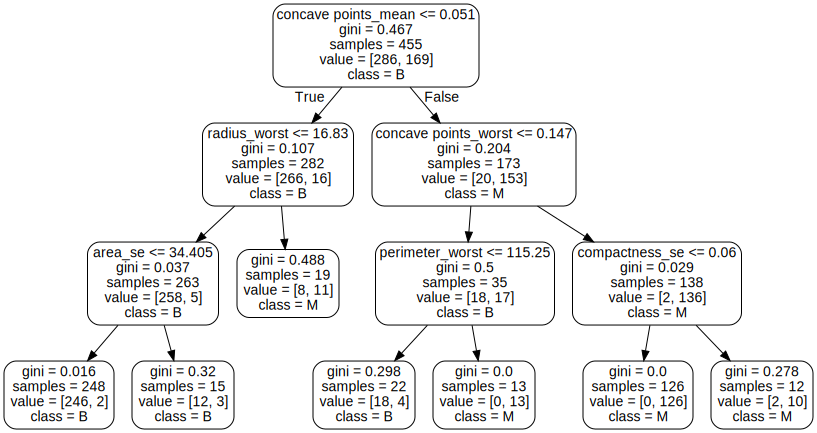

In [ ]:
import graphviz

attributes_name = X.columns.values

def Decision_Tree_draw (mdl,names):
    ds = tree.export_graphviz(mdl,out_file = None,
                             feature_names = names,
                             class_names = mdl.classes_,
                             filled = False, rounded = True,
                             special_characters =False)
    grp = graphviz.Source(ds)
    return grp

Decision_Tree_draw(model,attributes_name)

## Step 7: Make predictions using the model

Make predictions with the model's `predict` command, using `x_test` as the data. Save the results to a variable called `y_pred`.

In [ ]:
y_pred = model.predict(x_test)

## Step 8: Evaluate the predictive accuracy of the classifier



A confusion matrix can be used to evaluate the predictive accuracy of the classifier.
By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$ . All the diagonal elements denote correctly classified outcomes. The misclassified outcomes are represented on the off diagonals of the confusion matrix.


>Confusion matrix for a binary classifier:

![picture](https://drive.google.com/uc?id=1gWr3JoL6yRkSsHCwjrCnl3F5VTM4n2D9)

>$_{From: \ Tan,\ Steinbach,\ Karpatne,\ Kumar,\ Introduction\ to\ Data\ Mining\ 2nd\ Edition,\ Pearson\ 2019}$

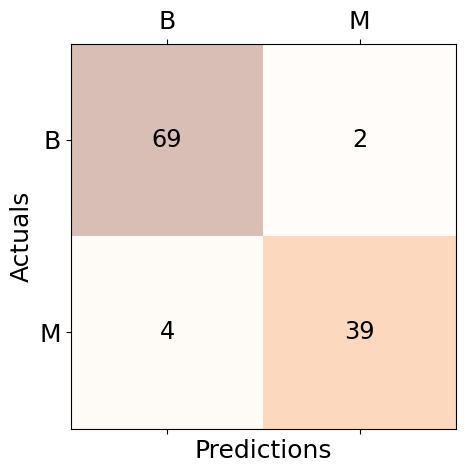

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# List of labels to index the matrix. This may be used to reorder or select a subset of labels.
# If None is given, those that appear at least once in y_true or y_pred are used in sorted order.
# conf_matrix = confusion_matrix(y_test, y_pred, labels=['M', 'B'])

# print(conf_matrix)

#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
# plt.title('Confusion Matrix', fontsize=18)
ax.set_xticks(range(2))
ax.set_yticks(range(2))
ax.set_xticklabels(['B', 'M'], fontsize=18)
ax.set_yticklabels(['B', 'M'], fontsize=18)
plt.show()

###Classification Evaluation metrics

>#### $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

Accuracy represents the number of correctly classified data instances over the total number of data instances.
Accuracy is not appropriate for unbalanced class label distribution and when misclassification of objects of a given class is more important (e.g. malignant tumor classified as benign).

>#### $Precision =  \frac{TP}{TP + FP}$

Precision is a valid choice of evaluation metric when we want to be very sure of our prediction.

>#### $Recall =  \frac{TP}{TP + FN}$

Recall is a valid choice of evaluation metric when we want to capture as many positives as possible.

In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

# print(precision_score(y_test, y_pred, average=None))
# precision, recall, fscore, support = score(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           B     0.9452    0.9718    0.9583        71
           M     0.9512    0.9070    0.9286        43

    accuracy                         0.9474       114
   macro avg     0.9482    0.9394    0.9435       114
weighted avg     0.9475    0.9474    0.9471       114



## Step 9: Tuning the classifier

The vast majority of predictive models have parameters. A parameter is a number to pick in advance that determines some aspect of how the model behaves. For example, in the Decision Tree classification algorithm, *max_depth* is a parameter that we have to pick that determines how deep the tree can be. By picking different values of *max_depth*, we create different classifiers that make different predictions.

To tune the model, we want to maximize the performance of our classifier on data it hasn’t seen yet. But **we cannot use our test data set in the process of building our model** (tuning is a part of model training), so we split the training data into two subsets, use one to train the model, and then use the other to evaluate it. The subset of training data used for evaluation is often called the **validation set**.

In a **k-fold cross-validation** strategy, the overall training data is randomly partitioned into k equal sized chunks (typically 10). Of the k chunks, one is retained as the validation data for testing the model, and the remaining k − 1 chunks are used as training data.
The cross-validation process is then repeated k times, with each of the k chunks used exactly once as the validation data. The k results can then be averaged to produce a single estimation of the accuracy of the classifier for a given value of the parameter.

We can use cross-validation to calculate an accuracy for each value of the parameter in a reasonable range, and then pick the value of the parameter that gives us the best accuracy.


In [ ]:
%%shell
jupyter nbconvert --to html /content/DecisionTreeClassifier_2025.ipynb